# Selecting our frame. We want to maximize the countries available and the timeframe while not having data that is too sparse

In [1]:
import pandas as pd
import numpy as np
data = pd.DataFrame
path = "DataSources\\swiiidGINI.csv"
data = pd.read_csv(path)

In [2]:
data

,country,year,gini_disp,gini_disp_se,gini_mkt,gini_mkt_se,abs_red,abs_red_se,rel_red,rel_red_se
0,Afghanistan,2007.0,30.0,2.6,33.3,2.9,NaN,NaN,NaN,NaN
1,Afghanistan,2008.0,30.1,2.7,33.4,2.8,NaN,NaN,NaN,NaN
2,Afghanistan,2009.0,30.2,2.7,33.5,2.8,NaN,NaN,NaN,NaN
3,Afghanistan,2010.0,30.2,2.7,33.6,2.9,NaN,NaN,NaN,NaN
4,Afghanistan,2011.0,30.3,2.8,33.7,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5220,Zimbabwe,2007.0,46.2,2.7,51.3,3.1,NaN,NaN,NaN,NaN
5221,Zimbabwe,2008.0,46.0,2.6,51.2,3.2,NaN,NaN,NaN,NaN
5222,Zimbabwe,2009.0,45.9,2.7,50.9,3.1,NaN,NaN,NaN,NaN
5223,Zimbabwe,2010.0,45.7,2.6,50.7,3.0,NaN,NaN,NaN,NaN


### Let's see how many countries' data is available each year

In [3]:
cntr = list(set(data["country"]))
yrs = list(set(data["country"]))

In [4]:
data[~data["gini_disp"].isna()].groupby("year").count()

,country,gini_disp,gini_disp_se,gini_mkt,gini_mkt_se,abs_red,abs_red_se,rel_red,rel_red_se
year,,,,,,,,,
1960.0,3,3,3,3,3,0,0,0,0
1961.0,9,9,9,9,9,0,0,0,0
1962.0,13,13,13,13,13,0,0,0,0
1963.0,15,15,15,15,15,0,0,0,0
1964.0,19,19,19,19,19,0,0,0,0
1965.0,22,22,22,22,22,0,0,0,0
1966.0,23,23,23,23,23,0,0,0,0
1967.0,25,25,25,25,25,0,0,0,0
1968.0,28,28,28,28,28,0,0,0,0


### Our best window seems to be from 1988 to 2014. Our other data mostly comes into play around 1996, but extra data hardly ever hurts. 

In [5]:
#Range 1988 to 2016
sy = 1988
ey = 2017
ty = list(range(sy, ey))
master = {}

In [6]:
frame = data[data.year.isin(ty)] #only consider data in our year range

In [7]:
#Only show countries with at least thresh entries in our dataset
thresh = 19
for cnt in cntr:
    temp = frame[frame["country"] == cnt]
    tl = set(temp["year"])
    if len(tl) < thresh:
        continue
    ta = [0]*(ey - sy)
    #print(ta)
    for x in tl:
        ta[int(x)-sy] = 1
        master[cnt] = ta

In [8]:
df = pd.DataFrame.from_dict(master, orient='index', columns = ty)

### Let's see availability of data. 1 means it's available, 0 means it is not

In [9]:
df

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Vietnam,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Uruguay,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Guatemala,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
Sweden,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Italy,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sri Lanka,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Swaziland,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
Mauritius,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
Moldova,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### 124 countries fit our threshold of having at least 19 entries. but this is hardly a good visualization. Let's do one better and analyze our data in one glance

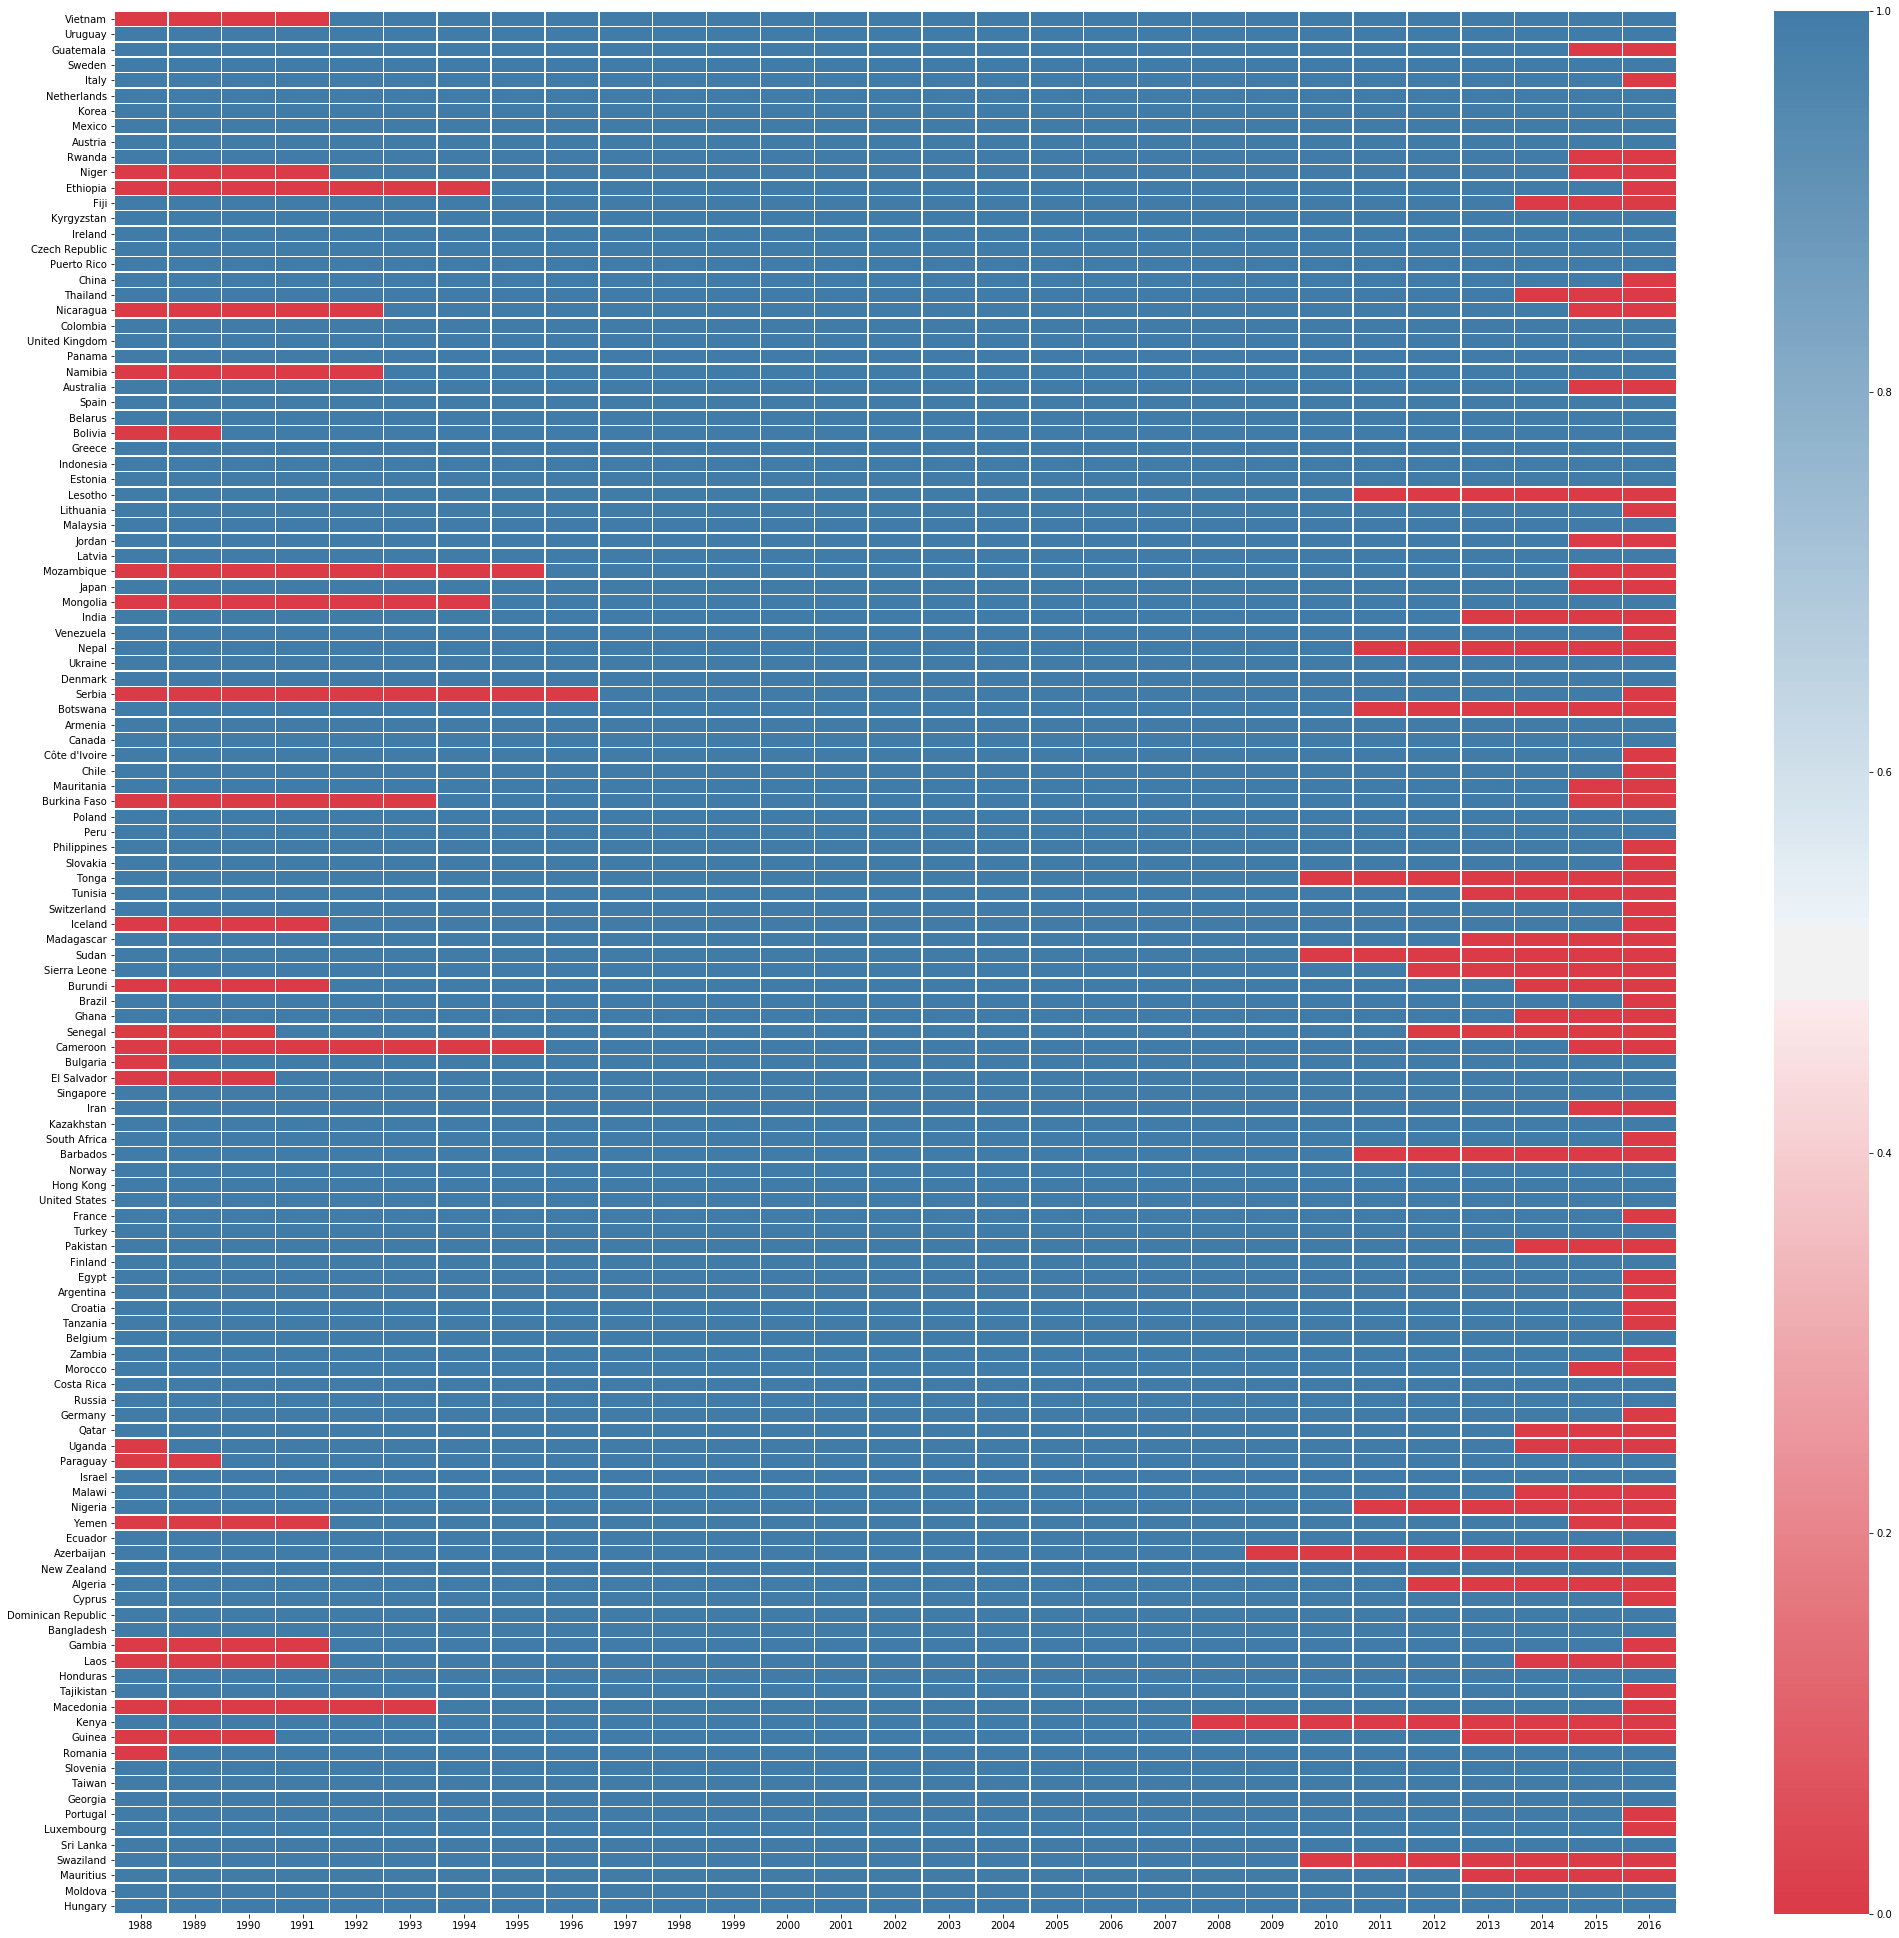

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(35,35)
fig = sns.heatmap(df, linewidths=.5, cmap=sns.diverging_palette(10, 240, as_cmap=True))

### Perfect! This allows us to see exactly when and where we have missing data. We see that the middle years are solid for the most part and the extremeties are missing for a ot of countries. So be it!